In [1]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

                      Text
0     ENDRY FREE/PALESTINE
1                  lina ⁴⁴
2     Egypt Today Magazine
3              Saraaahbada
4  Jemima | Free Palestine


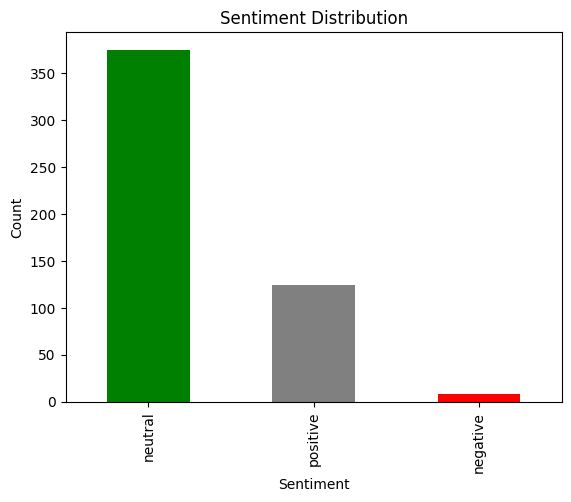

In [3]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the Twitter data from CSV
df = pd.read_csv('pal.csv')

# Display the first few rows of the dataframe to understand the structure of the data
print(df.head())

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each tweet
df['compound'] = df['Text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

# Categorize the sentiment into positive, neutral, or negative
df['sentiment'] = df['compound'].apply(lambda score: 'positive' if score > 0 else ('neutral' if score == 0 else 'negative'))

# Plot the distribution of sentiments
sentiment_distribution = df['sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [4]:
df.shape

(508, 3)

In [13]:
positive_tweets = df[df['sentiment'] == 'positive']

In [14]:
for index, tweet in positive_tweets.head(25)['Text'].items():
    print(f"Positive Tweet {index + 1}: {tweet}")

Positive Tweet 5: Jemima | Free Palestine
Positive Tweet 8: 19 FREE PALESTINE 48
Positive Tweet 9: JUSTICE FOR PALESTINE
Positive Tweet 11: s | free palestine
Positive Tweet 17: Save Palestine
Positive Tweet 20: Free Palestine
Positive Tweet 21: PlateMan | FREE PALESTINE
Positive Tweet 28: puu|| FREE PALESTINE
Positive Tweet 30: FACE BY JIMIN Free Palestine
Positive Tweet 32: ➼ Raychelle || || FREE PALESTINE
Positive Tweet 42: FREE PALESTINE
Positive Tweet 56: JUSTICE FOR PALESTINE
Positive Tweet 59: Den | FREE PALESTINE
Positive Tweet 60: sofi | FREE PALESTINE
Positive Tweet 64: ✰𝓣𝓐𝓔✰ | FREE PALESTINE
Positive Tweet 68: FREE PALESTINE | totally not a dumb robot
Positive Tweet 69: Faith !!
Positive Tweet 77: it's not free Palestine, it's now save Palestine
Positive Tweet 80: NO Justice or Human Rights in Scotland
Positive Tweet 83: Free Palestine
Positive Tweet 86: fio | Gojo Is Back FREE PALESTINE
Positive Tweet 90: Solidarity with Palestine #StopCopCity
Positive Tweet 96: fée lios FR

In [15]:
negative_tweets = df[df['sentiment'] == 'negative']

In [16]:
for index, tweet in negative_tweets.head(25)['Text'].items():
    print(f"Positive Tweet {index + 1}: {tweet}")

Positive Tweet 66: She is a mess.
Positive Tweet 76: FREE PALESTINE FUCK ISRAEL | sung markinnie
Positive Tweet 93: FREE PALESTINE FUCK ISRAEL | sung markinnie
Positive Tweet 136: The Rebel Wolf #Israël #Ukraine
Positive Tweet 164: Bofa Deez Nuts
Positive Tweet 185: miserable M's quarter life crisis
Positive Tweet 223: FREE PALESTINE FUCK ISRAEL | sung markinnie
Positive Tweet 310: Millennials Are Killing Capitalism


In [17]:
df['sentiment'].value_counts()

neutral     375
positive    125
negative      8
Name: sentiment, dtype: int64